In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
production = pd.read_csv("datas/time_series_60min_singleindex_TR.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('TR')),
                        parse_dates=[0], index_col=0)  
              

In [3]:
production.head()


,TR_load_actual_entsoe_transparency,TR_load_forecast_entsoe_transparency,TR_solar_capacity,TR_solar_generation_actual,TR_solar_profile,TR_wind_capacity,TR_wind_generation_actual,TR_wind_profile,TR_wind_offshore_capacity,TR_wind_offshore_generation_actual,...,TR_tennet_load_actual_entsoe_transparency,TR_tennet_load_forecast_entsoe_transparency,TR_tennet_solar_generation_actual,TR_tennet_wind_generation_actual,TR_tennet_wind_offshore_generation_actual,TR_tennet_wind_onshore_generation_actual,TR_transnetbw_load_actual_entsoe_transparency,TR_transnetbw_load_forecast_entsoe_transparency,TR_transnetbw_solar_generation_actual,TR_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


In [4]:
production = production.loc[production.index.year == 2016, :]

In [5]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   TR_load_actual_entsoe_transparency               8784 non-null   float64
 1   TR_load_forecast_entsoe_transparency             8784 non-null   float64
 2   TR_solar_capacity                                8784 non-null   float64
 3   TR_solar_generation_actual                       8712 non-null   float64
 4   TR_solar_profile                                 8712 non-null   float64
 5   TR_wind_capacity                                 8784 non-null   float64
 6   TR_wind_generation_actual                        8710 non-null   float64
 7   TR_wind_profile                                  8710 non-null   float64
 8   TR_wind_offshore_capacity                        8784 non-nu

(0.0, 35000.0)

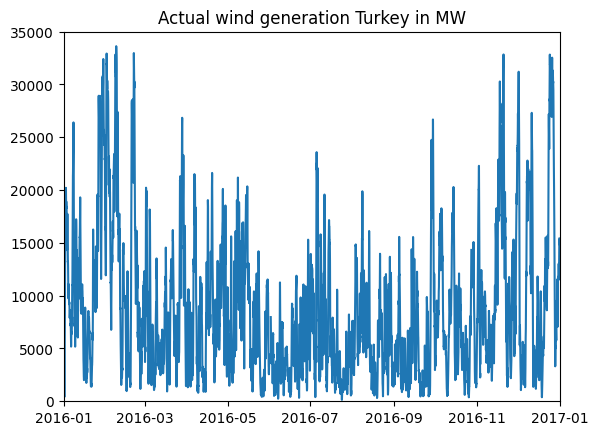

In [6]:
# create plot
plt.plot(production.index, production['TR_wind_generation_actual'])
plt.title('Actual wind generation Turkey in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)

(0.0, 27000.0)

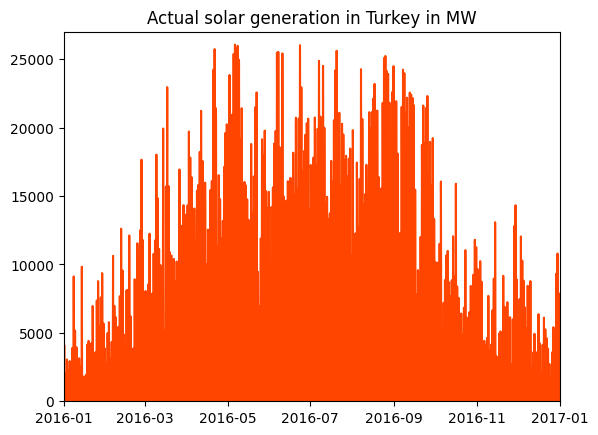

In [7]:
plt.plot(production.index, production['TR_solar_generation_actual'], c='OrangeRed')
plt.title('Actual solar generation in Turkey in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 27000)

In [8]:
production_wind_solar = production[['TR_wind_generation_actual', 'TR_solar_generation_actual']]


    wind
        v1: velocity [m/s] @ height h1 (2 meters above displacement height)
        v2: velocity [m/s] @ height h2 (10 meters above displacement height)
        v_50m: velocity [m/s] @ 50 meters above ground
        h1: height above ground [m] (h1 = displacement height +2m)
        h2: height above ground [m] (h2 = displacement height +10m)
        z0: roughness length [m]
    solar parameters:
        SWTDN: total top-of-the-atmosphere horizontal radiation [W/m²]
        SWGDN: total ground horizontal radiation [W/m²]
    temperature data
        T: Temperature [K] @ 2 meters above displacement height (see h1)
    air data
        Rho: air density [kg/m³] @ surface
        p: air pressure [Pa] @ surface


In [9]:
         

weather = pd.read_csv("datas/weather_data_result_TR_2016.csv",
                     parse_dates=[0], index_col=0)



In [10]:


weather.head(3)



,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188


In [11]:


weather.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cumulated hours  int64  
 1   lat              float64
 2   lon              float64
 3   v1               float64
 4   v2               float64
 5   v_50m            float64
 6   h1               int64  
 7   h2               int64  
 8   z0               float64
 9   SWTDN            float64
 10  SWGDN            float64
 11  T                float64
 12  rho              float64
 13  p                float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [12]:


weather.loc[weather.index == '2016-01-01 00:00:00', :]



,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 00:00:00+00:00,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01 00:00:00+00:00,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01 00:00:00+00:00,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01 00:00:00+00:00,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 00:00:00+00:00,0,55.0,12.500,3.71,4.36,5.06,2,10,0.006501,0.0,0.0,277.781799,1.280602,102218.710938
2016-01-01 00:00:00+00:00,0,55.0,13.125,3.82,4.34,4.69,2,10,0.002311,0.0,0.0,277.668518,1.283288,102282.710938
2016-01-01 00:00:00+00:00,0,55.0,13.750,3.75,4.23,4.61,2,10,0.003382,0.0,0.0,276.957581,1.287438,102290.710938


In [13]:


weather_by_day = weather.groupby(weather.index).mean()



In [14]:
weather_by_day.head(24)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.000000,0.000000,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.000000,0.000000,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.000000,0.000000,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.000000,0.000000,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.000000,0.000000,275.193369,1.254733,99319.750000
2016-01-01 05:00:00+00:00,5.0,51.25,10.3125,2.207227,3.160312,4.445078,2.546875,10.546875,0.164153,0.000000,0.000000,275.184228,1.254969,99336.710938
2016-01-01 06:00:00+00:00,6.0,51.25,10.3125,2.099336,3.027148,4.291758,2.546875,10.546875,0.164116,0.029503,0.002406,275.151314,1.255247,99357.078125
2016-01-01 07:00:00+00:00,7.0,51.25,10.3125,2.001992,2.903750,4.116836,2.542969,10.542969,0.164068,32.701265,4.885147,275.175961,1.255487,99383.765625
2016-01-01 08:00:00+00:00,8.0,51.25,10.3125,2.061836,2.915977,3.855273,2.542969,10.542969,0.164031,167.523132,34.330536,275.612767,1.255295,99415.406250


(0.0, 12.0)

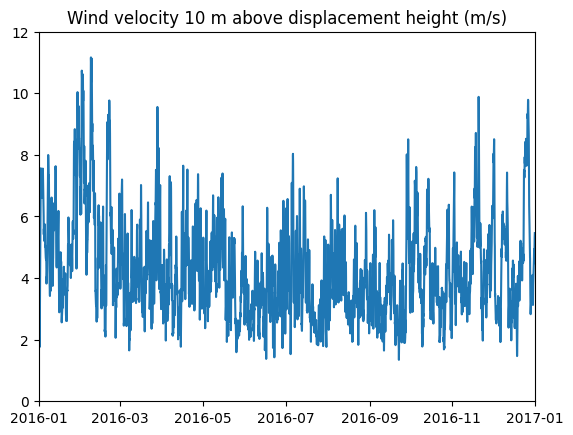

In [15]:
plt.plot(weather_by_day.index, weather_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)

(0.0, 1000.0)

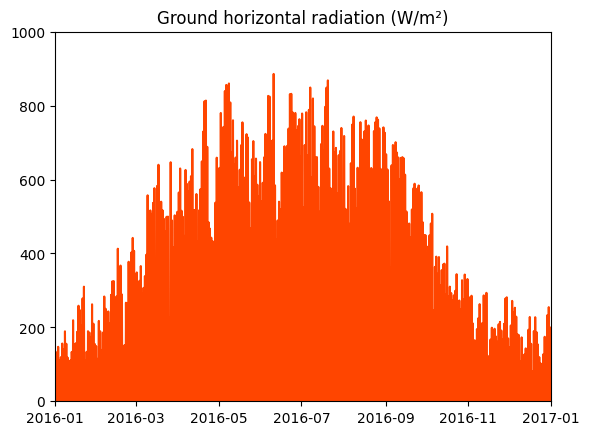

In [16]:
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)

(263.0, 303.0)

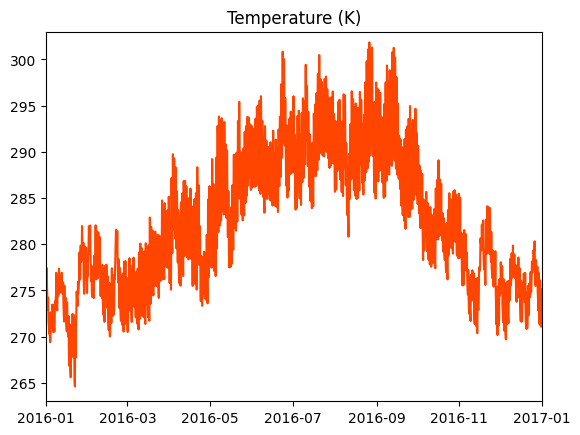

In [17]:
plt.plot(weather_by_day.index, weather_by_day['T'], c='OrangeRed')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(263, 303)

(16801.0, 17167.0)

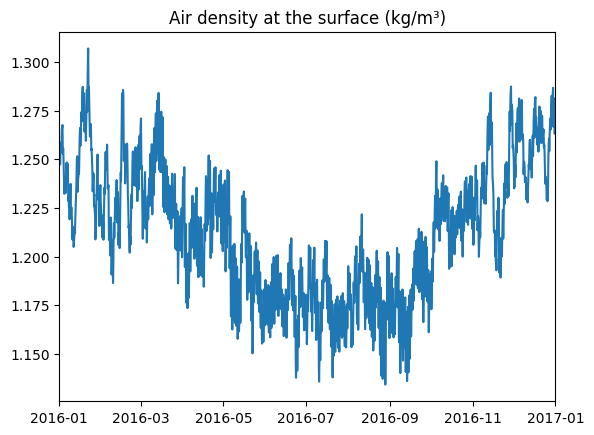

In [18]:
plt.plot(weather_by_day.index, weather_by_day['rho'])
plt.title('Air density at the surface (kg/m³)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

(16801.0, 17167.0)

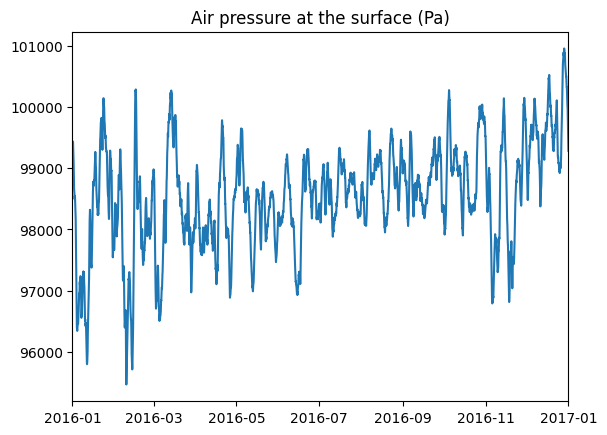

In [19]:
plt.plot(weather_by_day.index, weather_by_day['p'])
plt.title('Air pressure at the surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

In [20]:
combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)



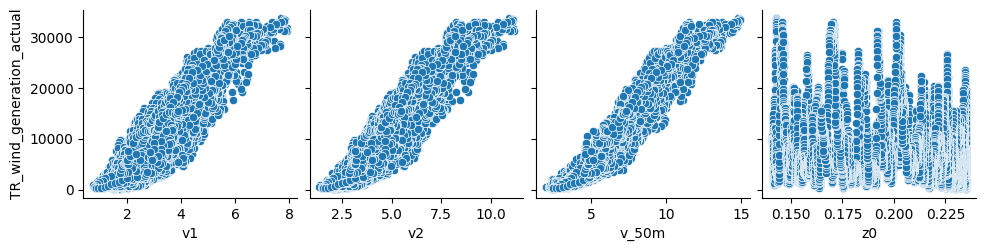

In [21]:


sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['TR_wind_generation_actual'])



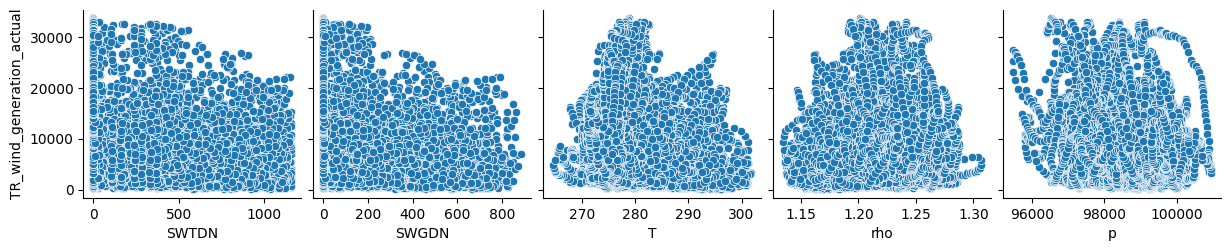

In [22]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['TR_wind_generation_actual'])


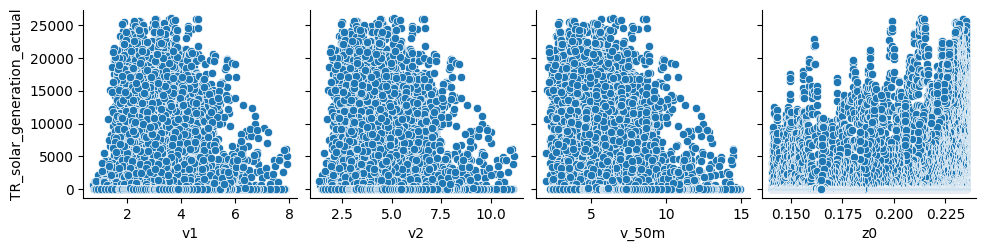

In [23]:
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['TR_solar_generation_actual'])

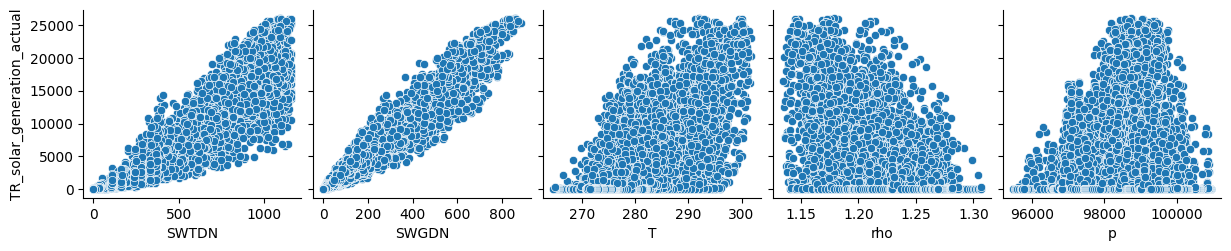

In [24]:


sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['TR_solar_generation_actual'])



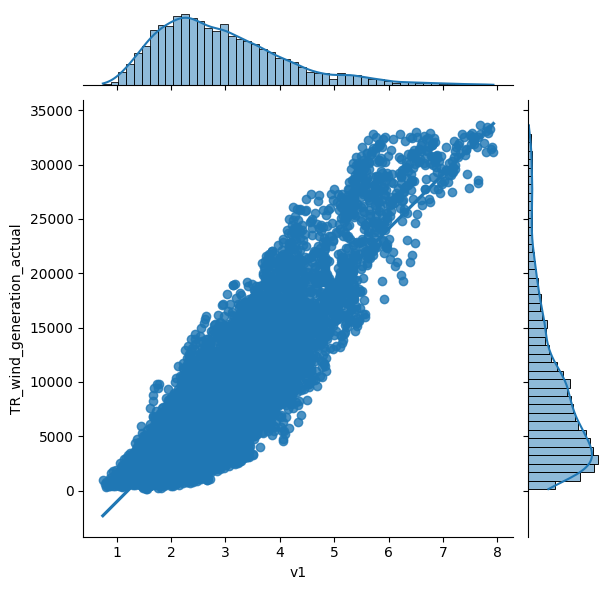

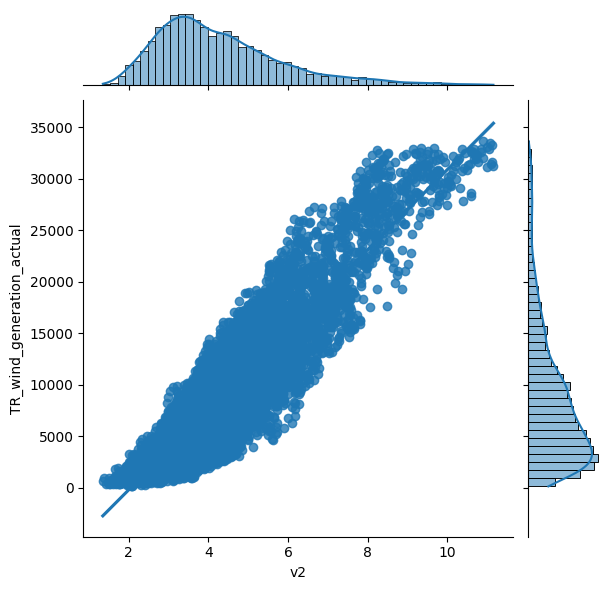

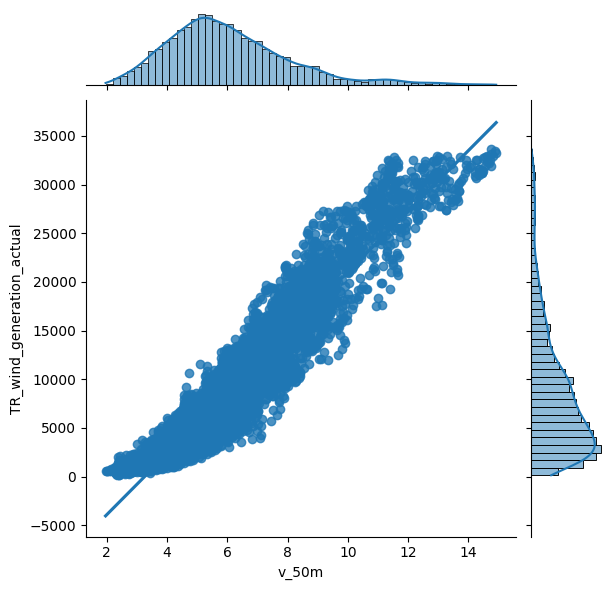

In [25]:


sns.jointplot(x='v1', y='TR_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v2', y='TR_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v_50m', y='TR_wind_generation_actual', data=combined, kind='reg')



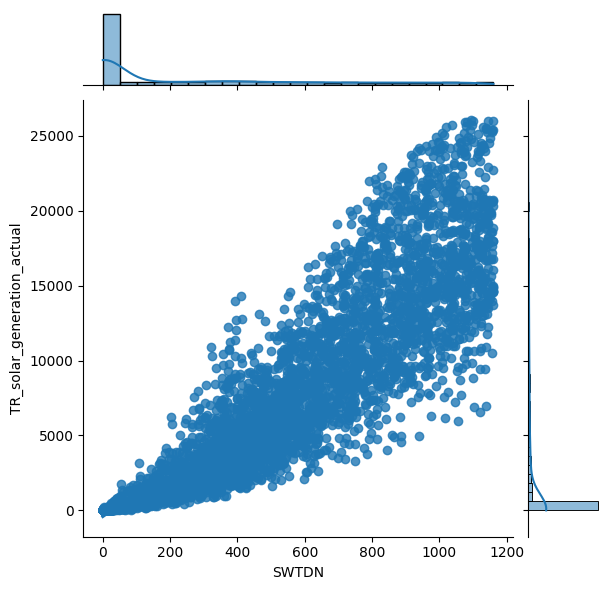

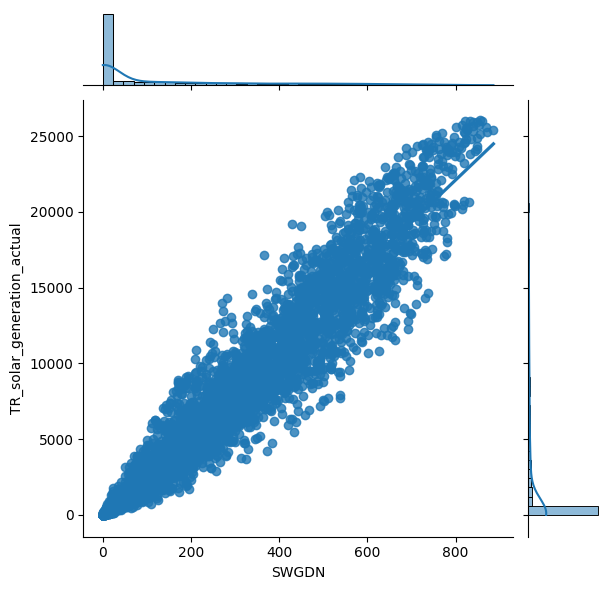

In [26]:
sns.jointplot(x='SWTDN', y='TR_solar_generation_actual', data=combined, kind='reg')
sns.jointplot(x='SWGDN', y='TR_solar_generation_actual', data=combined, kind='reg')